In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import folium
import json
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [32]:
pip install -U seaborn

     |████████████████████████████████| 296kB 17.2MB/s eta 0:00:01
  Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0
Note: you may need to restart the kernel to use updated packages.


world happiness data

In [3]:
#world happiness data

hap_2015=pd.read_csv('2015.csv')
hap_2015_df=pd.DataFrame(hap_2015)
hap_2016=pd.read_csv('2016.csv')
hap_2016_df=pd.DataFrame(hap_2016)
hap_2017=pd.read_csv('2017.csv')
hap_2017_df=pd.DataFrame(hap_2017)
hap_2018=pd.read_csv('2018.csv')
hap_2018_df=pd.DataFrame(hap_2018)
hap_2019=pd.read_csv('2019.csv')
hap_2019_df=pd.DataFrame(hap_2019)
hap_2020=pd.read_csv('2020.csv')
hap_2020_df=pd.DataFrame(hap_2020)
hap_2021=pd.read_csv('2021.csv')
hap_2021_df=pd.DataFrame(hap_2021)

hap_2018_df['Country or region'] =hap_2018_df['Country or region'].replace(
    to_replace='United States', value='United States of America')
hap_2018_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


birth rate

In [4]:
birth_rate=pd.read_csv('adolescentBirthRate.csv')
birth_rate_df=pd.DataFrame(birth_rate)
birth_rate_df.head()

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2017,Adolescent birth rate (per 1000 women aged 15-...,62.0
1,Afghanistan,2014,Adolescent birth rate (per 1000 women aged 15-...,77.2
2,Afghanistan,2013,Adolescent birth rate (per 1000 women aged 15-...,87.0
3,Afghanistan,2011,Adolescent birth rate (per 1000 women aged 15-...,125.7
4,Afghanistan,2009,Adolescent birth rate (per 1000 women aged 15-...,80.0


life expectancy

In [5]:
life_expectancy=pd.read_csv('life_expectancy_at_birth.csv')
life_expectancy_df=pd.DataFrame(life_expectancy)
life_expectancy_df.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21
1,Afghanistan,2019,Life expectancy at birth (years),Male,63.29
2,Afghanistan,2019,Life expectancy at birth (years),Female,63.16
3,Afghanistan,2015,Life expectancy at birth (years),Both sexes,61.65
4,Afghanistan,2015,Life expectancy at birth (years),Male,61.04


drinking water

In [6]:
# Opening drinking water JSON file
f = open('drinking_water.json')
data = json.load(f)
x =json_normalize(data["fact"])
df_water = pd.DataFrame(x)
df_water = df_water.drop(['dims.GHO',], axis=1)
df_water=df_water.rename(columns={"dims.COUNTRY": "Country", "dims.YEAR": "Year",'dims.RESIDENCEAREATYPE': 'Area'})
df_water.head()

,Value,Country,Year,Area
0,75,Afghanistan,2020,Total
1,100,Afghanistan,2020,Urban
2,66,Afghanistan,2020,Rural
3,28,Afghanistan,2020,Total
4,36,Afghanistan,2020,Urban


current health expend

In [7]:
# Opening current health expend JSON file
f = open('current_health_expend.json')
data = json.load(f)
x = json_normalize(data["fact"])
df_expend = pd.DataFrame(x)
df_expend = df_expend.drop(['dims.GHO',], axis=1)
df_expend=df_expend.rename(columns={"Value":"Percentage","dims.COUNTRY": "Country", "dims.YEAR": "Year"})
df_expend= df_expend.astype({'Percentage':float,'Country':str})
df_expend['Year']=pd.to_datetime(df_expend['Year'], format='%Y')
df_expend.head()

,Percentage,Country,Year
0,13.24,Afghanistan,2019-01-01
1,14.13,Afghanistan,2018-01-01
2,12.62,Afghanistan,2017-01-01
3,11.82,Afghanistan,2016-01-01
4,10.11,Afghanistan,2015-01-01


sanitation

In [8]:
sanitation = pd.read_csv('safelySanitization.csv')
#goes from 2000 to 2017

df_sanitation = pd.DataFrame(sanitation)
df_sanitation = df_sanitation.drop(['Indicator'], axis=1)
df_sanitation=df_sanitation.rename(columns ={'First Tooltip':'Percentage','Period':'Year'})



#the total value in Dim1 column does not equal the average of Rural and Urban values. It is slightly off
#Maybe just take away total and use Urban and Rural?
df_sanitation=df_sanitation[df_sanitation['Dim1'] != 'Total']

#average all values under First Tooltip for each country. Use groupby
df_sanitation=df_sanitation[['Location','Year','Percentage']]
df_sanitation=df_sanitation.groupby(['Location','Year']).mean().reset_index()
df_sanitation.head()

,Location,Year,Percentage
0,Albania,2000,38.780
1,Albania,2001,38.600
2,Albania,2002,38.425
3,Albania,2003,38.245
4,Albania,2004,38.070


## Mapping 2018 world Happiness on a Chloropleth Map

In [9]:
source=hap_2018_df
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/world-countries.json' 

found the world countries data source here

https://github.com/python-visualization/folium/tree/main/examples/data

possible pallete options: ‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’

In [10]:
usa_state = folium.Map(location=[48, -102], zoom_start=3)
folium.Choropleth(
    geo_data = state_geo,
    name ='choropleth',                  
    data = source,                     
    columns = ['Country or region', 'Score'], #columns to work on
    key_on ='feature.properties.name',
    fill_color ='PuBu',
    fill_opacity = .9,
    line_opacity = 0.2,
   legend_name = "Sanitation Percentage"
).add_to(usa_state)
usa_state

## Mapping distributions

In [11]:
#prepare the happiness dataframe structure, add year as a column
def hap_df(dataframe,column1,column2,year):
    df=dataframe[[column1,column2]]
    df.rename(columns = {column1:'Country',column2:'Happiness Score'}, inplace = True)
    df['Year']=year
    return df

df_2015=hap_df(hap_2015_df,'Country','Happiness Score',2015)
df_2016=hap_df(hap_2016_df,'Country','Happiness Score',2016)
df_2017=hap_df(hap_2017_df,'Country','Happiness.Score',2017)
df_2018=hap_df(hap_2018_df,'Country or region','Score',2018)
df_2019=hap_df(hap_2019_df,'Country or region','Score',2019)
df_2020=hap_df(hap_2020_df,'Country name','Ladder score',2020)
df_2021=hap_df(hap_2021_df,'Country name','Ladder score',2021)

#concatenate the dataframes together into one
final_df=df_2015.append([df_2016, df_2017,df_2018,df_2019,df_2020,df_2021])

#create the max, mean, min dataframe
grouped_df=final_df.groupby('Year').agg(['max','min','mean']).reset_index()

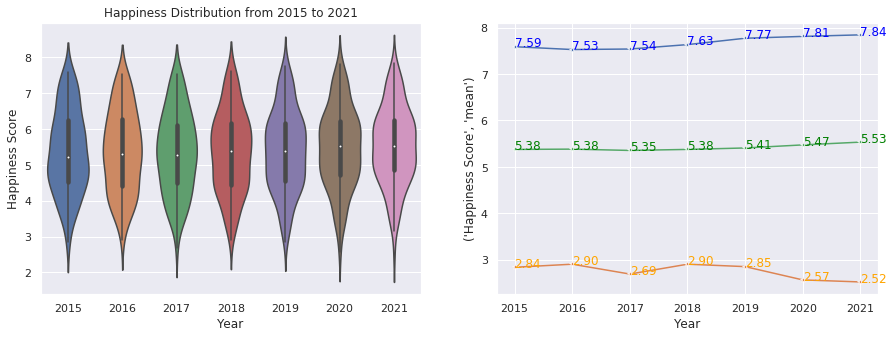

In [34]:
#plot the graphs as subplots

fig, axes = plt.subplots(1,2)
sns.set(rc={"figure.figsize":(15,5)})

#plot the violin plot for distributions of happiness per year
ax = sns.violinplot(x="Year", y="Happiness Score", data=final_df,ax=axes[0]
                   ).set(title='Happiness Distribution from 2015 to 2021')

#plot the max, mean, median as a linechart overtime
ax1=sns.lineplot(data=grouped_df, x="Year", y=('Happiness Score',  'max'),marker='*',ax=axes[1])
ax2=sns.lineplot(data=grouped_df, x="Year", y=('Happiness Score',  'min'),marker='*',ax=axes[1])
ax3=sns.lineplot(data=grouped_df, x="Year", y=('Happiness Score',  'mean'),marker='*',ax=axes[1])

#add text to the line chart
for x, y in zip(grouped_df['Year'],grouped_df[('Happiness Score','max')]):
    ax1.text(x=x,y=y,s='{:.2f}'.format(y),color='blue')
for x, y in zip(grouped_df['Year'],grouped_df[('Happiness Score','min')]):
    ax1.text(x=x,y=y,s='{:.2f}'.format(y),color='orange')
for x, y in zip(grouped_df['Year'],grouped_df[('Happiness Score','mean')]):
    ax1.text(x=x,y=y,s='{:.2f}'.format(y),color='green')

In [35]:
#prepare dataframes
life_expectancy_df_copy2=life_expectancy_df[life_expectancy_df['Dim1']=='Both sexes']

df_water_copy=df_water.groupby(['Country','Year']).tail(3)
df_water_copy=df_water_copy[df_water_copy['Area']!='Total']
df_water_copy=df_water_copy[df_water_copy['Value']!='']
df_water_copy['Value']=df_water_copy['Value'].astype(int)
df_water_copy_rural=df_water_copy[df_water_copy['Area']=='Urban']
df_water_copy_urban=df_water_copy[df_water_copy['Area']=='Rural']

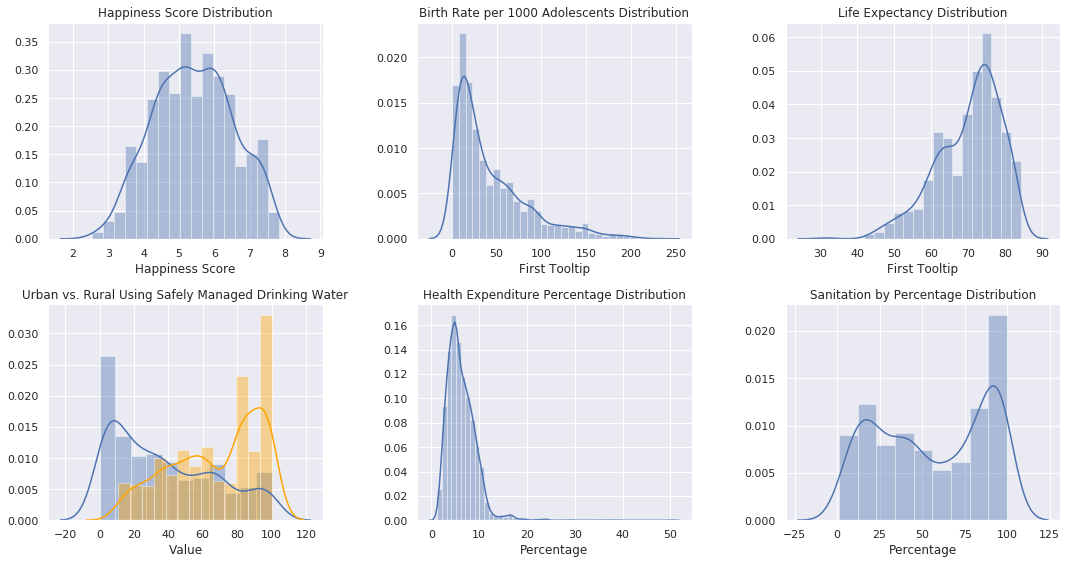

In [39]:
fig, axes = plt.subplots(2,3)
sns.set(rc={"figure.figsize":(15,8)})

#plot happiness distribution
sns.distplot(final_df['Happiness Score'],ax=axes[0,0]).set(title='Happiness Score Distribution')

#plot birth rate distribution
sns.distplot(birth_rate_df['First Tooltip'],ax=axes[0,1]).set(title='Birth Rate per 1000 Adolescents Distribution')

#plot life expectancy distribution
sns.distplot(life_expectancy_df_copy2['First Tooltip'],ax=axes[0,2]).set(title='Life Expectancy Distribution')

#plot water (urban and rural distribution)
sns.distplot(df_water_copy_urban['Value'],ax=axes[1,0])
sns.distplot(df_water_copy_rural['Value'],color='orange',ax=axes[1,0]
            ).set(title='Urban vs. Rural Using Safely Managed Drinking Water')

#plot expenditure distribution
sns.distplot(df_expend['Percentage'],ax=axes[1,1]).set(title='Health Expenditure Percentage Distribution')

#plot sanitation distribution
sns.distplot(df_sanitation['Percentage'],ax=axes[1,2]).set(title='Sanitation by Percentage Distribution')

fig.tight_layout()

## QQ Plots

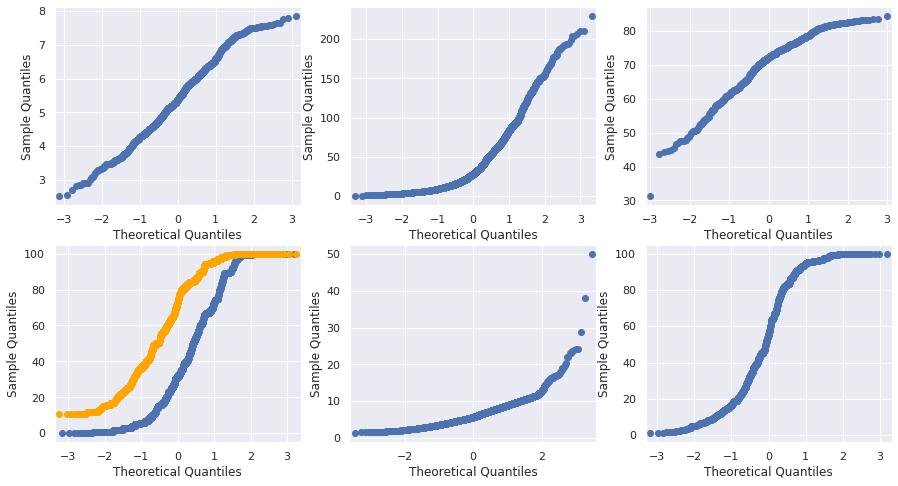

In [18]:
fig, axes = plt.subplots(2,3)
sns.set(rc={"figure.figsize":(15,8)})

sm.qqplot(final_df['Happiness Score'],ax=axes[0,0])
sm.qqplot(birth_rate_df['First Tooltip'],ax=axes[0,1])
sm.qqplot(life_expectancy_df_copy2['First Tooltip'],ax=axes[0,2])
sm.qqplot(df_water_copy_urban['Value'],ax=axes[1,0])
sm.qqplot(df_water_copy_rural['Value'],color='orange',ax=axes[1,0])
sm.qqplot(df_expend['Percentage'],ax=axes[1,1])
sm.qqplot(df_sanitation['Percentage'],ax=axes[1,2])

plt.show()

## Correlations

correlation between healthcare factors and hapiness score?

In [19]:
#make a dataframe that has the countries, their score, and each healthcare factor.

#healthcare factors= drinking water, birth rate, life expectancy, health expenditure, sanitation

#should I take the average score over all of the years? or the median score? Or should I just analyze one year?

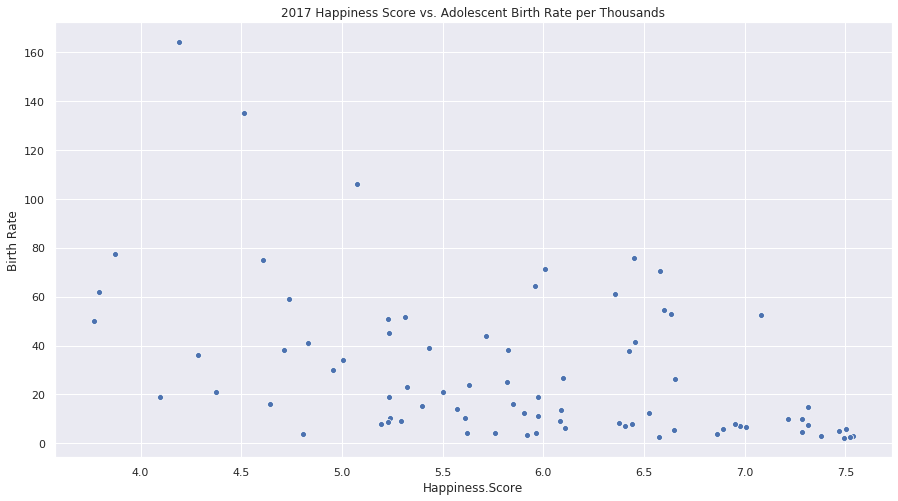

In [20]:
#year 2017
#take necessary columns from 2017 happiness dataset
copy_hap_2017_df=hap_2017_df[['Country','Happiness.Score']]   #17

#take the birth rate dataframe and only include 2017 data, rename columns, take necessary columns
copy_birth_rate_df=birth_rate_df[birth_rate_df['Period'] == 2017]
copy_birth_rate_df.rename(columns = {'Location':'Country','First Tooltip':'Birth Rate'}, inplace = True)
copy_birth_rate_df=copy_birth_rate_df[['Country','Birth Rate']]

#merge both dataframes to create new df
hap_birth_rate_df=copy_hap_2017_df.merge(copy_birth_rate_df, on='Country')

scatter_plot=sns.scatterplot(data=hap_birth_rate_df, x="Happiness.Score", y="Birth Rate").set(
    title='2017 Happiness Score vs. Adolescent Birth Rate per Thousands')

###spearman correlation coefficient

In [21]:
hap_birth_rate_df.corr(method='spearman')

,Happiness.Score,Birth Rate
Happiness.Score,1.000000,-0.505617
Birth Rate,-0.505617,1.000000


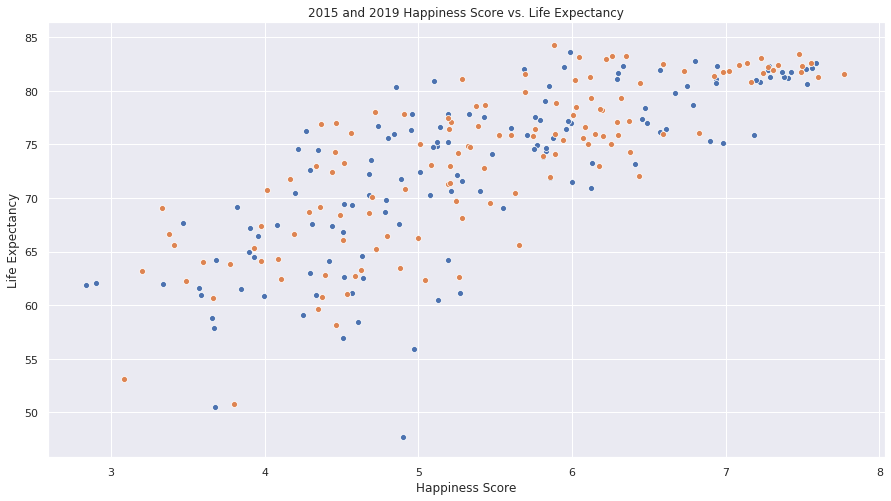

In [22]:
#only include year 2015 and 2019
life_expectancy_df_copy=life_expectancy_df[(
    life_expectancy_df['Period'] == 2015)|(
    life_expectancy_df['Period'] == 2019)]
#only include both sexes
life_expectancy_df_copy=life_expectancy_df_copy[life_expectancy_df_copy['Dim1']=='Both sexes']
#only include necessary columns
life_expectancy_df_copy=life_expectancy_df_copy[['Location','Period','First Tooltip']]
#pivot columns
life_expect_df_table = pd.pivot_table(life_expectancy_df_copy, values='First Tooltip',
                                      index='Location',columns='Period').reset_index()
#rename columns
life_expect_df_table.rename(columns = {'Location':'Country',
                                       2015:'2015 Life Expectancy',
                                       2019:'2019 Life Expectancy'}, inplace = True)

#pepare hapiness data, take necessary columns, rename columns
copy_hap_2015_df=hap_2015_df[['Country','Happiness Score']]
copy_hap_2015_df.rename(columns = {'Happiness Score':'2015 Happiness Score'}, inplace = True)
copy_hap_2019_df=hap_2019_df[['Country or region','Score']]
copy_hap_2019_df.rename(columns = {'Country or region':'Country','Score':'2019 Happiness Score'}, inplace = True)

#merge dataframes together
total_hap_score=copy_hap_2015_df.merge(copy_hap_2019_df, on='Country')
hap_life_expect=total_hap_score.merge(life_expect_df_table,on='Country')

scatter_plot=sns.scatterplot(data=hap_life_expect, x="2015 Happiness Score", y="2015 Life Expectancy")
scatter_plot=sns.scatterplot(data=hap_life_expect, x="2019 Happiness Score", y="2019 Life Expectancy").set(
    title='2015 and 2019 Happiness Score vs. Life Expectancy',
    xlabel='Happiness Score',
    ylabel='Life Expectancy')

In [23]:
hap_life_expect.corr(method='spearman')

,2015 Happiness Score,2019 Happiness Score,2015 Life Expectancy,2019 Life Expectancy
2015 Happiness Score,1.000000,0.919177,0.795830,0.792474
2019 Happiness Score,0.919177,1.000000,0.799724,0.800191
2015 Life Expectancy,0.795830,0.799724,1.000000,0.995514
2019 Life Expectancy,0.792474,0.800191,0.995514,1.000000


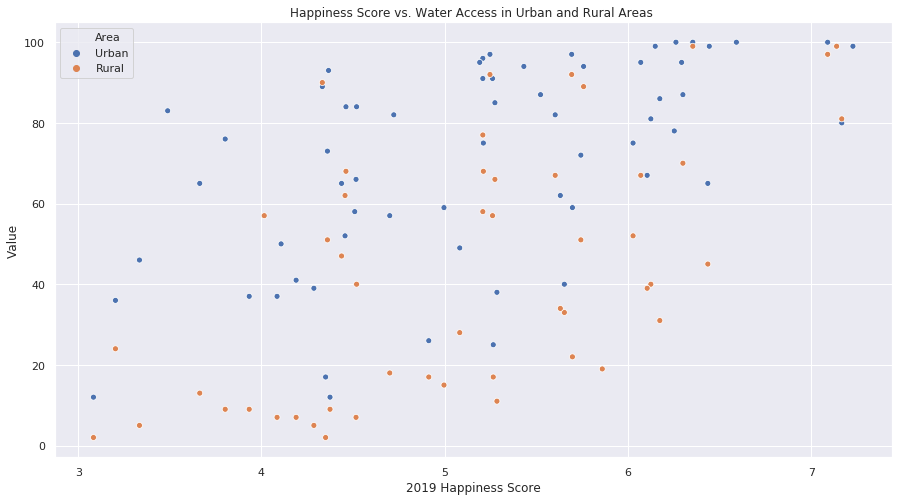

In [24]:
#Take the bottom three values of each country and year value.
df_water_copy=df_water.groupby(['Country','Year']).tail(3)

#remove total values
df_water_copy=df_water_copy[df_water_copy['Area'] != 'Total'] 

df_water_copy=df_water_copy[df_water_copy['Year'] == '2019']

df_water_copy=df_water_copy[df_water_copy['Value'] != '']

df_water_copy=df_water_copy.astype({'Value':int})
#groupby Country and Area

hap_2019_df_copy=hap_2019_df[['Country or region','Score']]
hap_2019_df_copy.rename(columns = {'Country or region':'Country','Score':'2019 Happiness Score'}, inplace = True)

hap_water=hap_2019_df_copy.merge(df_water_copy,on='Country')
scatter_plot=sns.scatterplot(data=hap_water, x="2019 Happiness Score", y="Value", hue='Area').set(
    title='Happiness Score vs. Water Access in Urban and Rural Areas ')


In [25]:
hap_water.corr(method='spearman')

,2019 Happiness Score,Value
2019 Happiness Score,1.000000,0.547981
Value,0.547981,1.000000


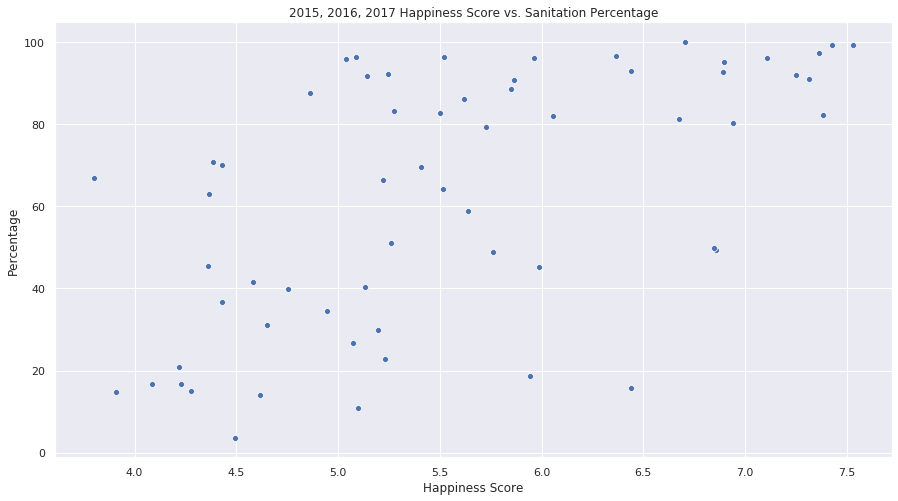

In [26]:
#only keep year 15,16,17
df_sanitation_copy =df_sanitation[(
    df_sanitation['Year'] == 2015)|(
    df_sanitation['Year'] == 2016)|(
    df_sanitation['Year'] == 2017)]

#groupby location and take the average
df_sanitation_copy=df_sanitation_copy.groupby('Location').mean().reset_index()
df_sanitation_copy.rename(columns = {'Location':'Country'}, inplace = True)
df_sanitation_copy=df_sanitation_copy[['Country','Percentage']]


copy_2015_df=hap_2015_df[['Country','Happiness Score']]
copy_2016_df=hap_2016_df[['Country','Happiness Score']]
copy_2017_df=hap_2017_df[['Country','Happiness.Score']]

merge1=copy_2015_df.merge(copy_2016_df,on='Country')
merge2=merge1.merge(copy_2017_df,on='Country')
merge2['Happiness Score']=(merge2['Happiness Score_x']+merge2['Happiness Score_y']+merge2['Happiness.Score'])/3
merge2=merge2[['Country','Happiness Score']]

hap_sanitation_copy2=df_sanitation_copy.merge(merge2,on='Country')


scatter_plot=sns.scatterplot(data=hap_sanitation_copy2, x="Happiness Score", y="Percentage"
                            ).set(title='2015, 2016, 2017 Happiness Score vs. Sanitation Percentage')

In [27]:
hap_sanitation_copy2.corr(method='spearman')

,Percentage,Happiness Score
Percentage,1.000000,0.607086
Happiness Score,0.607086,1.000000


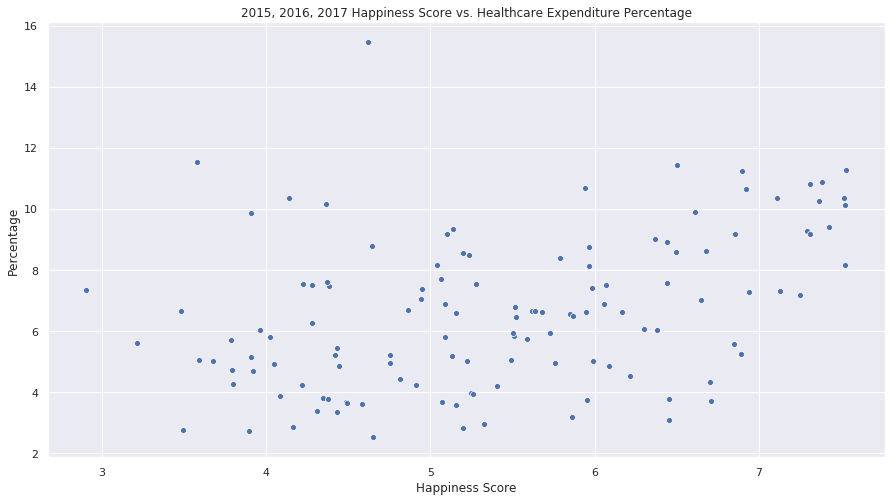

In [28]:
df_expend_copy=df_expend[(
    df_expend['Year'] == '2015')|(
    df_expend['Year'] == '2016')|(
    df_expend['Year'] == '2017')]

#groupby location and take the average
df_expend_copy['Percentage']=df_expend_copy['Percentage'].astype(float)
df_expend_copy=df_expend_copy.groupby('Country').mean().reset_index()
df_expend_copy=df_expend_copy[['Country','Percentage']]

df_expend_copy2=df_expend_copy.merge(merge2,on='Country')

scatter_plot=sns.scatterplot(data=df_expend_copy2, x="Happiness Score", y="Percentage"
                            ).set(title='2015, 2016, 2017 Happiness Score vs. Healthcare Expenditure Percentage')

In [29]:
df_expend_copy2.corr(method='spearman')

,Percentage,Happiness Score
Percentage,1.000000,0.395379
Happiness Score,0.395379,1.000000


In [30]:
hap_2015_df.corr(method='spearman')

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-1.000000,0.215198,-0.795703,-0.770038,-0.756960,-0.576352,-0.302397,-0.172463,-0.532487
Happiness Score,-1.000000,1.000000,-0.215198,0.795703,0.770038,0.756960,0.576352,0.302397,0.172463,0.532487
Standard Error,0.215198,-0.215198,1.000000,-0.219528,-0.213146,-0.290820,-0.186721,-0.146096,-0.113474,-0.022128
Economy (GDP per Capita),-0.795703,0.795703,-0.219528,1.000000,0.681042,0.847096,0.415421,0.227675,0.012482,0.077430
Family,-0.770038,0.770038,-0.213146,0.681042,1.000000,0.585431,0.528139,0.184599,0.146399,0.190534
Health (Life Expectancy),-0.756960,0.756960,-0.290820,0.847096,0.585431,1.000000,0.399800,0.168847,0.110256,0.078333
Freedom,-0.576352,0.576352,-0.186721,0.415421,0.528139,0.399800,1.000000,0.463745,0.418458,0.095441
Trust (Government Corruption),-0.302397,0.302397,-0.146096,0.227675,0.184599,0.168847,0.463745,1.000000,0.213357,0.054815
Generosity,-0.172463,0.172463,-0.113474,0.012482,0.146399,0.110256,0.418458,0.213357,1.000000,0.008091
Dystopia Residual,-0.532487,0.532487,-0.022128,0.077430,0.190534,0.078333,0.095441,0.054815,0.008091,1.000000


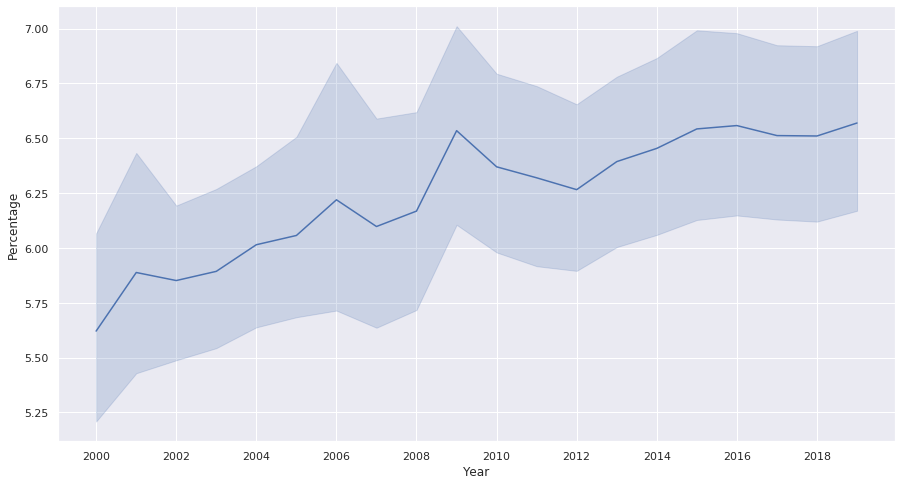

In [31]:
expend_line=sns.lineplot(data=df_expend,x='Year',y='Percentage')